In [1]:
!pip install pygame

fastai 1.0.60 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from gamestate import GameState, start_ai_only_game
from models.RandomModel import RandomModel
from models.HeuristicModel import HeuristicModel
from models.DeepRLModel import DeepRLModel
from trainutil import train_models, test_models, get_epsilon_decay_factor
import fsutils as fs

In [24]:
import torch
torch.cuda.is_available()

True

In [25]:
episodes = 200
steps = 500 

gamma = 0.99

buffer_capacity = 15000
buffer_learn_thresh = 0.5
batch_size = 128

start_epsilon = 0.99
min_epsilon = 0.01
decay_window = episodes - int(buffer_learn_thresh * buffer_capacity / steps)
decay_window = 150
decay = get_epsilon_decay_factor(start_epsilon, min_epsilon, decay_window)

print(decay_window)
print(decay)

150
0.9698303377354692


In [26]:
env = GameState()
deep_rl_model = DeepRLModel(
                    epsilon = start_epsilon,
                    min_epsilon = min_epsilon,
                    epsilon_decay = decay,
                    gamma = gamma,
                    buffer_capacity = buffer_capacity,
                    replay_buffer_learn_thresh = buffer_learn_thresh,
                    batch_size = batch_size)
# rand_model_1 = RandomModel(min_steps=5, max_steps=10)
# rand_model_2 = RandomModel(min_steps=5, max_steps=10)
models = [deep_rl_model]

print(deep_rl_model.model)

DQN(
  (fc1): Linear(in_features=21, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=8, bias=True)
  (relu): ReLU()
)



TRAIN MODE
=== Starting Episode 0 ===


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Mean Episode Loss: nan | Episode Reward: 3.3380 | Mean Reward: 3.3380
=== Starting Episode 1 ===
Mean Episode Loss: nan | Episode Reward: 4.3739 | Mean Reward: 3.8559
=== Starting Episode 2 ===
Mean Episode Loss: nan | Episode Reward: 3.3627 | Mean Reward: 3.6915
=== Starting Episode 3 ===
Mean Episode Loss: nan | Episode Reward: 4.3365 | Mean Reward: 3.8528
=== Starting Episode 4 ===
Mean Episode Loss: nan | Episode Reward: 3.3498 | Mean Reward: 3.7522
=== Starting Episode 5 ===
Mean Episode Loss: nan | Episode Reward: 2.4769 | Mean Reward: 3.5396
=== Starting Episode 6 ===
Mean Episode Loss: nan | Episode Reward: 3.4111 | Mean Reward: 3.5213
=== Starting Episode 7 ===
Mean Episode Loss: nan | Episode Reward: 3.3220 | Mean Reward: 3.4964
=== Starting Episode 8 ===
Mean Episode Loss: nan | Episode Reward: 6.2028 | Mean Reward: 3.7971
=== Starting Episode 9 ===
Mean Episode Loss: nan | Episode Reward: 4.2913 | Mean Reward: 3.8465
=== Starting Episode 10 ===
Mean Episode Loss: nan | Epis

epsilon after decay:  0.22066207496823093
Mean Episode Loss: 0.0706 | Episode Reward: 18.1070 | Mean Reward: 14.0102
=== Starting Episode 63 ===
epsilon after decay:  0.21400477469184884
Mean Episode Loss: 0.0281 | Episode Reward: 0.0110 | Mean Reward: 13.5736
=== Starting Episode 64 ===
epsilon after decay:  0.20754832291639874
Mean Episode Loss: 0.0300 | Episode Reward: 20.9708 | Mean Reward: 14.2609
=== Starting Episode 65 ===
epsilon after decay:  0.20128666011044122
Mean Episode Loss: 0.0272 | Episode Reward: 10.1311 | Mean Reward: 13.3861
=== Starting Episode 66 ===
epsilon after decay:  0.19521390955655382
Mean Episode Loss: 0.0273 | Episode Reward: 13.2148 | Mean Reward: 12.7073
=== Starting Episode 67 ===
epsilon after decay:  0.18932437183589393
Mean Episode Loss: 44683.7861 | Episode Reward: 8.0983 | Mean Reward: 12.1574
=== Starting Episode 68 ===
epsilon after decay:  0.18361251947916057
Mean Episode Loss: 195.4490 | Episode Reward: 4.6286 | Mean Reward: 11.2081
=== Starti

epsilon after decay:  0.03849340452965085
Mean Episode Loss: 20025.7010 | Episode Reward: 15.4231 | Mean Reward: 11.4276
=== Starting Episode 120 ===
epsilon after decay:  0.03733207151557933
Mean Episode Loss: 44.1747 | Episode Reward: 2.4287 | Mean Reward: 10.3549
=== Starting Episode 121 ===
epsilon after decay:  0.03620577552631899
Mean Episode Loss: 15.4207 | Episode Reward: 1.3816 | Mean Reward: 10.1475
=== Starting Episode 122 ===
epsilon after decay:  0.035113459506664536
Mean Episode Loss: 7.5142 | Episode Reward: 16.8875 | Mean Reward: 11.5029
=== Starting Episode 123 ===
epsilon after decay:  0.03405409829240919
Mean Episode Loss: 4.9252 | Episode Reward: 4.5211 | Mean Reward: 11.0239
=== Starting Episode 124 ===
epsilon after decay:  0.033026697648204074
Mean Episode Loss: 3.4543 | Episode Reward: 2.4770 | Mean Reward: 9.3830
=== Starting Episode 125 ===
epsilon after decay:  0.03203029333444499
Mean Episode Loss: 2.5111 | Episode Reward: 21.8842 | Mean Reward: 10.3450
=== 

epsilon after decay:  0.01
Mean Episode Loss: 0.0633 | Episode Reward: 7.1686 | Mean Reward: 8.9353
=== Starting Episode 178 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0572 | Episode Reward: 7.2620 | Mean Reward: 9.1240
=== Starting Episode 179 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0608 | Episode Reward: 11.3195 | Mean Reward: 10.0180
=== Starting Episode 180 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0634 | Episode Reward: 1.9944 | Mean Reward: 9.9819
=== Starting Episode 181 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0674 | Episode Reward: 12.2202 | Mean Reward: 9.7956
=== Starting Episode 182 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0538 | Episode Reward: 1.4363 | Mean Reward: 8.9248
=== Starting Episode 183 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0628 | Episode Reward: 6.3551 | Mean Reward: 8.5228
=== Starting Episode 184 ===
epsilon after decay:  0.01
Mean Episode Loss: 0.0569 | Episode Reward: 3.1510 | Mean Reward: 8

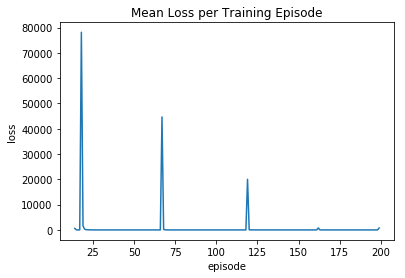

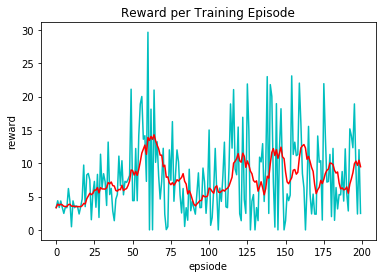

In [27]:
model_name = "test"
train_models(env, models, episodes=episodes, steps=steps, print_every=1000, model_name=model_name)
# test_models(env, models, steps=2000)

In [28]:
fs.save_net_to_disk(deep_rl_model.model, model_name)